<a href="https://colab.research.google.com/github/DavoFlow/CRUCE_EMAs/blob/main/CRUCE_EMAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Cruce EMAs

Vamos a crear un modelo de trading que prediga entradas de compra utilizando cruce de EMA 20 y 50, que funcione multi temporal y para cualquier activo.

## Instalación de librerías

Instalaremos las librerías necesarias para obtener datos de mercado, como `yfinance`, y para el análisis y visualización, como `pandas`, `numpy` y `matplotlib`.


In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obtención de datos

Crearemos una función para descargar datos históricos de cualquier activo y en diferentes temporalidades utilizando `yfinance`.


In [2]:
def descargar_datos(ticker, start_date, end_date):
  """
  Descarga datos históricos de un activo desde Yahoo Finance.

  Args:
    ticker: Símbolo del activo (eje., 'AAPL').
    start_date: Fecha de inicio en formato 'YYYY-MM-DD'.
    end_date: Fecha de fin en formato 'YYYY-MM-DD'.

  Returns:
    Un DataFrame de pandas con los datos históricos.
  """
  datos = yf.download(ticker, start=start_date, end=end_date)
  return datos

# Ejemplo de uso
datos = descargar_datos('AAPL', '2020-01-01', '2023-01-01')
display(datos.head())

/tmp/ipython-input-9876841.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


## Cálculo de emas

Implementaremos una función para calcular las Medias Móviles Exponenciales (EMAs) de 20 y 50 períodos.


In [3]:
def calcular_emas(df):
  """
  Calcula las Medias Móviles Exponenciales (EMAs) de 20 y 50 períodos.

  Args:
    df: DataFrame con los datos de precios.

  Returns:
    DataFrame con las columnas 'EMA20' y 'EMA50' añadidas.
  """
  df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
  df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
  return df

datos = calcular_emas(datos)
display(datos.tail())

Price,Close,High,Low,Open,Volume,EMA20,EMA50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2022-12-23,130.173782,130.726619,127.982170,129.245801,63814900,137.432157,141.562635
2022-12-27,128.367203,129.729560,127.073957,129.699945,69007800,136.568828,141.045167
2022-12-28,124.428215,129.354401,124.260391,128.011792,85438400,135.412579,140.393522
2022-12-29,127.952576,128.811445,126.096619,126.353289,75703700,134.702103,139.905642
2022-12-30,128.268448,128.288196,125.800425,126.767896,77034200,134.089374,139.449281


## Identificación de señales de compra

Desarrollaremos la lógica para identificar los cruces de la EMA de 20 por encima de la EMA de 50, que generarán las señales de compra.


In [4]:
datos['Cruce'] = datos['EMA20'] > datos['EMA50']
datos['Señal_Compra'] = (datos['Cruce'] == True) & (datos['Cruce'].shift(1) == False)
display(datos[datos['Señal_Compra']])

Price,Close,High,Low,Open,Volume,EMA20,EMA50,Cruce,Señal_Compra
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2020-01-09,74.864616,75.058043,74.035288,74.286741,170108400,72.802307,72.689317,True,True
2020-05-01,70.059364,72.466010,69.278961,69.375904,240616800,67.246920,67.190680,True,True
2021-04-13,131.332687,131.557399,128.890288,129.388547,91266500,123.558858,123.186332,True,True
2021-06-17,128.972198,129.715959,126.877954,127.024756,96721700,125.037146,124.845037,True,True
2021-10-21,146.503143,146.659961,144.925205,145.846488,61421000,142.493884,142.402550,True,True
2022-03-28,172.573730,172.701480,169.035767,169.202835,90371900,163.445307,163.166464,True,True
2022-07-22,151.656937,153.812359,150.987681,152.936413,66675400,144.753344,144.714897,True,True


## Visualización de resultados

Crearemos un gráfico que muestre el precio del activo, las EMAs y las señales de compra para una fácil interpretación.


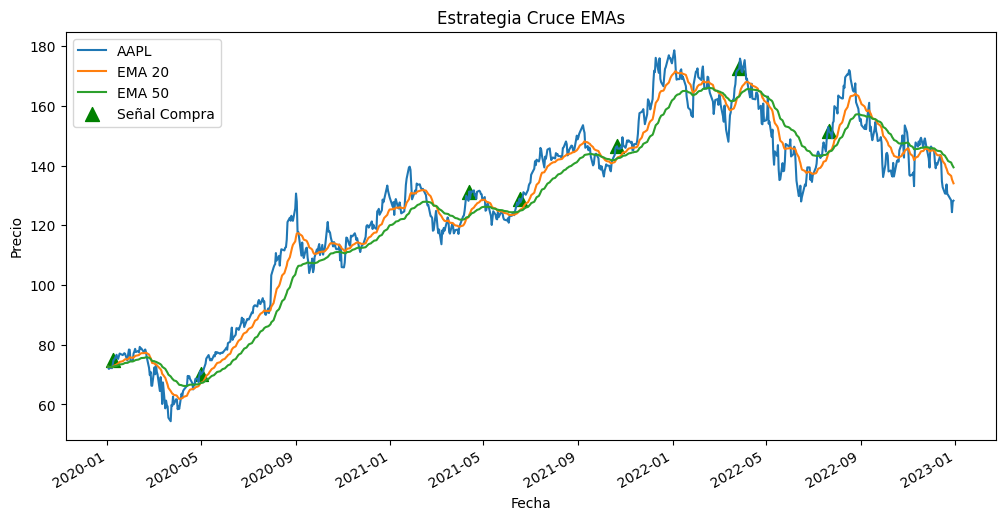

In [5]:
fig, ax = plt.figure(figsize=(12, 6)), plt.gca()

datos['Close'].plot(ax=ax, label='Precio Cierre')
datos['EMA20'].plot(ax=ax, label='EMA 20')
datos['EMA50'].plot(ax=ax, label='EMA 50')

ax.scatter(datos[datos['Señal_Compra']].index, datos[datos['Señal_Compra']]['Close'],
           marker='^', color='green', s=100, label='Señal Compra')

ax.set_title('Estrategia Cruce EMAs')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.legend()

plt.show()

## Resumen:

### Hallazgos Clave del Análisis de Datos
- **Adquisición de Datos**: Los datos históricos de Apple Inc. (AAPL) del 1 de enero de 2020 al 1 de enero de 2023 se descargaron correctamente mediante la biblioteca `yfinance`.
- **Cálculo de Indicadores**: Se calcularon y añadieron al conjunto de datos las Medias Móviles Exponenciales (EMA) de 20 y 50 períodos.
- **Generación de Señales**: Se creó una columna "Señal\_Compra" para identificar los puntos exactos donde la EMA de 20 períodos intersecto la de 50 períodos. El análisis identificó 7 señales de compra dentro del período especificado.
- **Visualización**: El precio de cierre, ambas EMA y las señales de compra generadas se representaron en un gráfico, lo que proporciona una representación visual clara de los puntos de entrada de la estrategia de trading. El gráfico destaca eficazmente casos como el del 9 de enero de 2020, donde el cruce de la EMA activó una señal de compra.

